<a href="https://colab.research.google.com/github/Pipickin/Tensorflow/blob/main/Images/Simple_model/fashion_MNIST_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

In [ ]:
# import tensorflow to create a model
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train, X_test = X_train/255., X_test/255.
print('shape of X_train before reshape: ', X_train.shape)
X_train_FC = X_train
X_test_FC = X_test
X_train = X_train.reshape(X_train.shape[0], 28,28,1)
X_test = X_test.reshape(X_test.shape[0], 28,28,1)
print('shape of X_train after reshape: ', X_train.shape)

shape of X_train before reshape:  (60000, 28, 28)
shape of X_train after reshape:  (60000, 28, 28, 1)


In [ ]:
X_train.shape

(60000, 28, 28, 1)

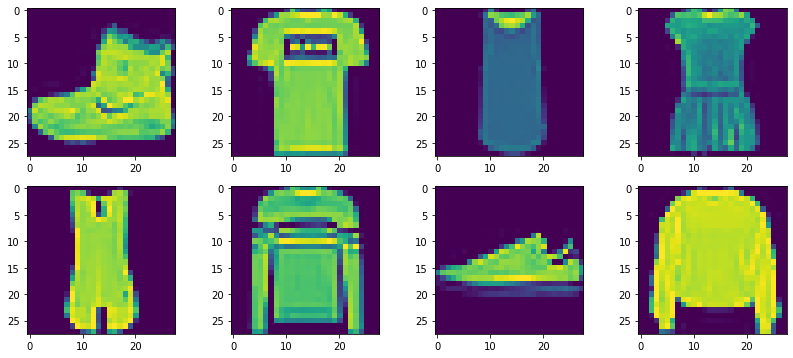

In [ ]:
# let's take a look at our images
_, axes = plt.subplots(2,4, figsize = (14,6))
for ax, image in zip(axes.ravel(), X_train[:,:,:,0]):
  ax.imshow(image)

In [ ]:
model = tf.keras.Sequential([layers.Conv2D(32, (3,3), input_shape = (28,28,1), padding='same', activation = 'relu'),
                             layers.BatchNormalization(),
                             layers.Conv2D(32, (3,3), padding='same', activation = 'relu'),
                             layers.BatchNormalization(),
                             layers.MaxPool2D((2,2)),
                             layers.Conv2D(64, (3,3), activation = 'relu'),
                             layers.BatchNormalization(),
                             layers.Conv2D(64,(3,3), activation = 'relu'),
                             layers.BatchNormalization(),
                             layers.MaxPool2D((2,2)),
                             layers.Flatten(),
                             layers.Dense(52, activation='relu'),
                             layers.BatchNormalization(),
                             layers.Dense(10, activation='softmax')])
                             
                             #layers.Flatten(),
                             #layers.Dense(128, activation = tf.keras.activations.relu),
                             #layers.Dense(10,activation = tf.keras.activations.softmax)])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 12, 12, 64)        2

In [ ]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss = tf.losses.SparseCategoricalCrossentropy(),
              metrics = 'accuracy')

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 224s 120ms/step - loss: 0.3595 - accuracy: 0.8729
Epoch 2/5
1875/1875 [==============================] - 227s 121ms/step - loss: 0.2461 - accuracy: 0.9104
Epoch 3/5
1875/1875 [==============================] - 222s 119ms/step - loss: 0.2085 - accuracy: 0.9235
Epoch 4/5
1875/1875 [==============================] - 222s 119ms/step - loss: 0.1785 - accuracy: 0.9336
Epoch 5/5
1875/1875 [==============================] - 227s 121ms/step - loss: 0.1572 - accuracy: 0.9420


In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 9s 28ms/step - loss: 0.2429 - accuracy: 0.9131


[0.24292363226413727, 0.913100004196167]